In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
import json

In [2]:
#import datasets
orders_dataset_raw = pd.read_csv("./digikala_dataset/orders.csv")
orders_dataset_raw.head(4)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0


In [3]:
orders_dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [4]:
divar_dataset_cities = ['اهواز','تهران', 'اصفهان', 'کرج', 'کرمانشاه','مشهد' , 'قم' , 'شیراز' , 'تبریز' ]

In [5]:
big_cities_orders = orders_dataset_raw.loc[orders_dataset_raw['city_name_fa'].isin(divar_dataset_cities)]
big_cities_orders

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
...,...,...,...,...,...,...,...
199989,8320537,659553,192749,2017-08-24 11:38:29.000,37798.0,تهران,24.0
199991,23311624,4293370,1193629,2018-10-15 18:03:08.000,370000.0,تهران,1.0
199994,4228418,3720408,123312,2016-06-14 05:05:39.000,120000.0,تهران,1.0
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0


In [6]:
grouped = big_cities_orders.groupby("city_name_fa")
groups = []
for name, group in grouped:
#     print("\n"+name.upper()+"\n")
#     print(group['ID_Item'].value_counts())
#     print(len(group['ID_Item'].value_counts()))
    groups.append(group)


In [7]:
combined_groups = groups[0].ID_Item.value_counts().add(groups[1].ID_Item.value_counts())
for i in range(2,len(groups)):
    combined_groups = combined_groups.add(groups[i].ID_Item.value_counts())

    
combined_groups = combined_groups.dropna()
combined_groups

8289      169.0
12532      95.0
14041      51.0
19890     119.0
28104      48.0
36871     246.0
41923      44.0
43418      43.0
45121     190.0
51778     206.0
77707      79.0
118375     98.0
137583     88.0
143130     92.0
164602     68.0
205612     49.0
230209     70.0
245223     88.0
294942    306.0
391372     65.0
416448    125.0
417989     50.0
448116     59.0
479349     76.0
Name: ID_Item, dtype: float64

In [8]:

vectors = []
for name, group in grouped:
    series = group['ID_Item'].value_counts()[combined_groups.keys()]
    series.name = name
    vectors.append(series )
    

In [9]:
clean_data = pd.concat(vectors, axis=1).transpose()
clean_data

,8289,12532,14041,19890,28104,36871,41923,43418,45121,51778,...,164602,205612,230209,245223,294942,391372,416448,417989,448116,479349
اصفهان,10,2,4,2,4,11,2,3,13,11,...,8,1,3,2,14,6,7,2,3,2
اهواز,2,1,1,1,1,3,1,1,5,4,...,3,1,4,5,4,1,3,1,1,1
تبریز,1,5,2,4,1,8,1,1,2,5,...,2,1,1,4,3,1,1,1,1,2
تهران,137,66,36,88,33,186,30,32,146,154,...,44,33,52,64,230,42,101,34,44,58
شیراز,3,11,1,8,2,4,1,1,3,7,...,4,2,1,1,4,3,2,1,1,2
قم,3,2,3,1,1,8,2,1,2,3,...,4,1,1,1,10,3,2,2,3,1
مشهد,3,2,2,9,2,11,4,1,11,8,...,1,4,2,3,22,4,4,5,2,5
کرج,8,3,1,4,3,10,2,2,5,8,...,1,3,4,3,11,4,4,1,3,4
کرمانشاه,2,3,1,2,1,5,1,1,3,6,...,1,3,2,5,8,1,1,3,1,1


In [10]:
clean_data_numpy = clean_data.to_numpy()

clean_data_numpy = (clean_data_numpy.T / clean_data_numpy.max(axis=1 )).T
clean_data_numpy

array([[0.71428571, 0.14285714, 0.28571429, 0.14285714, 0.28571429,
        0.78571429, 0.14285714, 0.21428571, 0.92857143, 0.78571429,
        0.28571429, 0.42857143, 0.21428571, 0.35714286, 0.57142857,
        0.07142857, 0.21428571, 0.14285714, 1.        , 0.42857143,
        0.5       , 0.14285714, 0.21428571, 0.14285714],
       [0.28571429, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.42857143, 0.14285714, 0.14285714, 0.71428571, 0.57142857,
        0.42857143, 1.        , 0.57142857, 0.57142857, 0.42857143,
        0.14285714, 0.57142857, 0.71428571, 0.57142857, 0.14285714,
        0.42857143, 0.14285714, 0.14285714, 0.14285714],
       [0.125     , 0.625     , 0.25      , 0.5       , 0.125     ,
        1.        , 0.125     , 0.125     , 0.25      , 0.625     ,
        0.125     , 0.125     , 0.25      , 0.25      , 0.25      ,
        0.125     , 0.125     , 0.5       , 0.375     , 0.125     ,
        0.125     , 0.125     , 0.125     , 0.25      ],
       [0.595

In [26]:

def evaluate_model(model):
    try:
        silhouete = metrics.silhouette_score(clean_data_numpy, model.labels_, metric='euclidean')
        calinski = metrics.calinski_harabasz_score(clean_data_numpy, model.labels_)
        davies_bouldin_score = metrics.davies_bouldin_score(clean_data_numpy, model.labels_)
    except:
        return None
    return {"silhouete":silhouete, "calinski":calinski,"davies_bouldin_score":davies_bouldin_score}

def print_model_evaluations(model):
    evaluations = evaluate_model(model)
    print("\n"+type(model).__name__+":")
    print([(a,b) for a, b in sorted(zip(clean_data.index, model.labels_), key=lambda x: x[1])] )
    if not evaluations:
        print(" Error")
        return
    for name , result in evaluations.items():
        print(f"{name} : {result}")


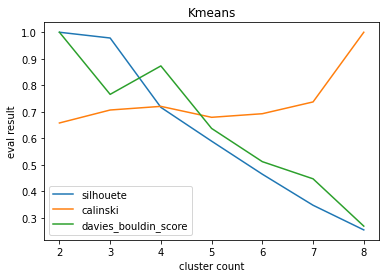

In [12]:
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,9):
        
        kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(clean_data_numpy)
        evaluation = evaluate_model(kmeans)
        if evaluation:
            results[0].append(evaluation["silhouete"])
            results[1].append(evaluation["calinski"])
            results[2].append(evaluation["davies_bouldin_score"])
            cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Kmeans')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

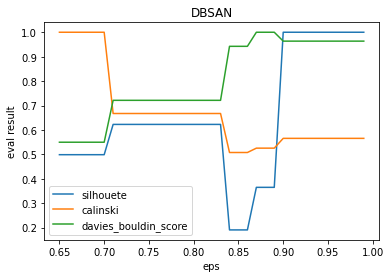

In [13]:
results = [[],[],[]]
eps_values = []
for eps in [x * 0.01 for x in range(1, 100)]:
        
    db = DBSCAN(eps=eps, min_samples=1, metric='euclidean').fit(clean_data_numpy)

    evaluation = evaluate_model(db)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        eps_values.append(eps)
        

results = [l / max(l) for l in results] # normalize result

plt.plot(eps_values, results[0], label = "silhouete")

plt.plot(eps_values, results[1], label = "calinski")

plt.plot(eps_values, results[2], label = "davies_bouldin_score")

plt.xlabel('eps')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('DBSAN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

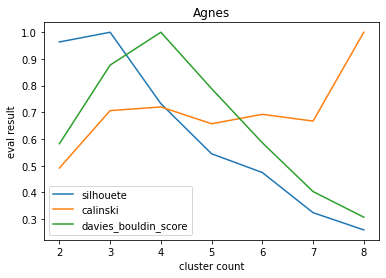

In [14]:
       
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,9):
        
    agnes = AgglomerativeClustering(n_clusters=cluster_number,affinity='euclidean',linkage='average').fit(clean_data_numpy)
    evaluation = evaluate_model(agnes)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Agnes')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(clean_data_numpy)

db = DBSCAN(eps=0.8, min_samples=2).fit(clean_data_numpy)
agnes = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average').fit(clean_data_numpy)

In [30]:
models = (agnes, kmeans , db)
for model in models:
    print_model_evaluations(model)


AgglomerativeClustering:
[('اصفهان', 0), ('تهران', 0), ('قم', 0), ('مشهد', 0), ('کرج', 0), ('کرمانشاه', 0), ('اهواز', 1), ('تبریز', 2), ('شیراز', 2)]
silhouete : 0.19104218141784604
calinski : 2.8508292282649745
davies_bouldin_score : 0.9191025355840696

KMeans:
[('اصفهان', 0), ('اهواز', 0), ('تهران', 0), ('قم', 0), ('مشهد', 0), ('کرج', 0), ('کرمانشاه', 0), ('تبریز', 1), ('شیراز', 1)]
silhouete : 0.19528799339835842
calinski : 2.6533901193784124
davies_bouldin_score : 1.2005087197721858

DBSCAN:
[('اهواز', -1), ('تبریز', -1), ('شیراز', -1), ('قم', -1), ('مشهد', -1), ('کرمانشاه', -1), ('اصفهان', 0), ('تهران', 0), ('کرج', 0)]
silhouete : 0.08882232132715538
calinski : 1.8323723303177575
davies_bouldin_score : 1.6051167095803636


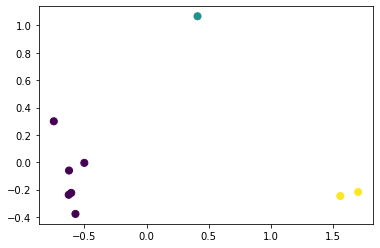

In [17]:

show_plot(kmeans.labels_)


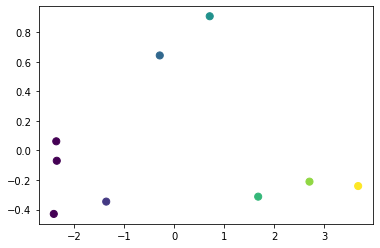

In [18]:

show_plot(db.labels_)


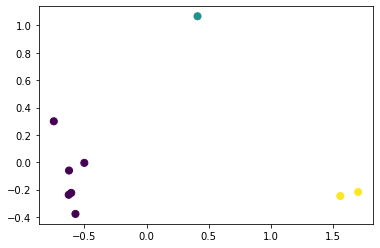

In [19]:

show_plot(agnes.labels_)

In [22]:
def show_plot(labels):
    data_numpy_with_labels = np.concatenate((clean_data_numpy,np.array([labels]).T) , axis=1)
    pca = PCA(2)
    plot_df = pca.fit_transform(data_numpy_with_labels)
    plt.scatter(plot_df[:, 0], plot_df[:, 1], c=labels, s=50, cmap='viridis')